In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('D:\\Data-science\\Cardiotocographic.csv')
data.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [4]:
data.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2106.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.270154,0.004391,0.067540,0.003340,0.003343,0.000142,0.000840,18.813973,1.173632,21.205041,7.772858,42.931822,0.645622,0.644619
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005650,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


In [5]:
data.shape

(2126, 14)

In [6]:
# find the duplicates
data[data.duplicated()]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
1115,122.0,0.000000,0.0,0.000000,0.0,0.0,0.0,19.0,1.9,0.0,15.1,39.0,0.0,1.0
1458,148.0,0.004717,0.0,0.002358,0.0,0.0,0.0,40.0,0.9,0.0,10.6,35.0,0.0,1.0


### drop the duplicate values

In [7]:
data = data.drop_duplicates()
data.shape

(2124, 14)

### find the null value in columns

In [8]:
data.isnull().sum()


LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [9]:
data[data[['LB','AC']].isnull().any(axis=1)]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
50,NaN,NaN,0.000000,0.008086,0.000000,NaN,NaN,29.000000,1.300000,0.000000,NaN,NaN,NaN,NaN
116,NaN,0.038567,0.000000,0.006993,0.002331,NaN,NaN,26.000000,4.300000,0.532872,NaN,NaN,NaN,NaN
126,NaN,NaN,0.000000,0.004380,0.000000,NaN,NaN,69.000000,0.300000,21.000000,NaN,NaN,NaN,NaN
201,NaN,NaN,0.016393,0.000000,0.000000,NaN,NaN,56.000000,0.500000,12.000000,NaN,NaN,NaN,NaN
566,NaN,NaN,0.000000,0.004115,0.005487,NaN,NaN,43.000000,2.500000,0.000000,NaN,NaN,NaN,NaN
574,NaN,NaN,0.000000,0.002611,0.002611,NaN,NaN,34.000000,4.900000,0.000000,NaN,NaN,NaN,NaN
603,NaN,NaN,0.006519,0.001304,0.001304,NaN,NaN,73.000000,0.700000,0.000000,NaN,NaN,NaN,NaN
935,NaN,NaN,0.000000,0.005495,0.001374,NaN,NaN,30.000000,1.251793,0.000000,NaN,NaN,NaN,NaN
936,NaN,NaN,0.000000,0.007802,0.000000,NaN,NaN,33.000000,1.000000,0.000000,NaN,NaN,NaN,NaN
1013,NaN,NaN,0.000000,0.003861,0.000000,NaN,NaN,34.000000,1.000000,0.000000,NaN,NaN,NaN,NaN


In [10]:
print('The % of missing values in LB is', round((data['LB'].isnull().sum()/len(data)*100),1))
print('The % of missing values in AC is', round((data['AC'].isnull().sum() / len(data) * 100), 1))
print('The % of missing values in DS is', round((data['DS'].isnull().sum() / len(data) * 100), 1))
print('The % of missing values in DP is', round((data['DP'].isnull().sum() / len(data) * 100), 1))

The % of missing values in LB is 1.0
The % of missing values in AC is 0.9
The % of missing values in DS is 1.0
The % of missing values in DP is 1.0


In [11]:
data['LB'] = data['LB'].fillna(data['LB'].mean())
data['AC'] = data['AC'].fillna(data['AC'].mean())
data['DS'] = data['DS'].fillna(data['DS'].mean())
data['DP'] = data['DP'].fillna(data['DP'].mean())

In [12]:
data.isna().sum()

LB           0
AC           0
FM           0
UC           0
DL           0
DS           0
DP           0
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [13]:
from scipy import stats

z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
print(z_scores)
outliers = (z_scores > 3).all(axis=1)

# Optionally, remove outliers
data = data[~outliers]


            LB        AC         FM        UC        DL        DS        DP  \
0     1.190215  0.736726   0.146604  1.315619  0.567499  0.017828  0.209763   
1     0.119719  0.722996   0.146604  0.594666  0.386682  0.017828  0.209763   
2     0.030511  0.023445   0.146604  1.171401  0.426307  0.017828  0.209763   
3     0.058697  0.150782   0.146604  1.002588  0.198533  0.017828  0.209763   
4     0.124337  0.753902   0.146604  1.122795  0.567499  0.017828  0.209763   
...        ...       ...        ...       ...       ...       ...       ...   
2121  0.593945  0.736726  14.082826  0.907925  0.567499  0.017828  0.209763   
2122  0.593945  0.559490   0.146604  0.774226  0.567499  0.017828  0.209763   
2123  0.593945  0.512401   0.146604  0.739342  0.567499  0.017828  0.209763   
2124  0.593945  0.581389   0.146604  0.513936  0.567499  0.017828  0.209763   
2125  0.772361  0.367079   0.149380  1.103098  0.567499  0.017828  0.209763   

          ASTV      MSTV      ALTV  MLTV  Width  Te

In [14]:
summary =data.describe()

#### Calculate the median for each variable

In [15]:
median = data.median()
median 

LB          133.000000
AC            0.001668
FM            0.000000
UC            0.004486
DL            0.000000
DS            0.000000
DP            0.000000
ASTV         49.000000
MSTV          1.200000
ALTV          0.000000
MLTV          7.400000
Width        67.486468
Tendency      0.000000
NSP           1.000000
dtype: float64

#### Calculate the interquartile range (IQR) for each variable

In [16]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
IQR

LB          14.000000
AC           0.005612
FM           0.002568
UC           0.004678
DL           0.003292
DS           0.000000
DP           0.000000
ASTV        29.000000
MSTV         1.000000
ALTV        11.000000
MLTV         6.300000
Width       63.000000
Tendency     1.000000
NSP          0.000000
dtype: float64

In [17]:
statistical_summary = pd.DataFrame({
    'mean': summary.loc['mean'],
    'median': median,
    'std_dev': summary.loc['std'],
    'IQR': IQR
})
statistical_summary

,mean,median,std_dev,IQR
LB,133.342023,133.000000,11.212396,14.000000
AC,0.003220,0.001668,0.004371,0.005612
FM,0.009904,0.000000,0.067571,0.002568
UC,0.004394,0.004486,0.003340,0.004678
DL,0.001897,0.000000,0.003344,0.003292
DS,0.000003,0.000000,0.000141,0.000000
DP,0.000175,0.000000,0.000836,0.000000
ASTV,47.012459,49.000000,18.812403,29.000000
MSTV,1.364345,1.200000,1.174084,1.000000
ALTV,10.295650,0.000000,21.212676,11.000000


In [18]:
# find skew value all numerical data
skew = data.skew()
skew

LB          0.322669
AC          2.025927
FM          6.749691
UC          0.973685
DL          2.008927
DS          8.456793
DP          6.451156
ASTV        0.054887
MSTV        4.141709
ALTV        2.979526
MLTV        3.543278
Width       0.493673
Tendency   -0.498010
NSP         1.809369
dtype: float64

### Data visulation Histogram

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import skew

Text(0.5, 1.0, 'Histogram of ALTV Data')

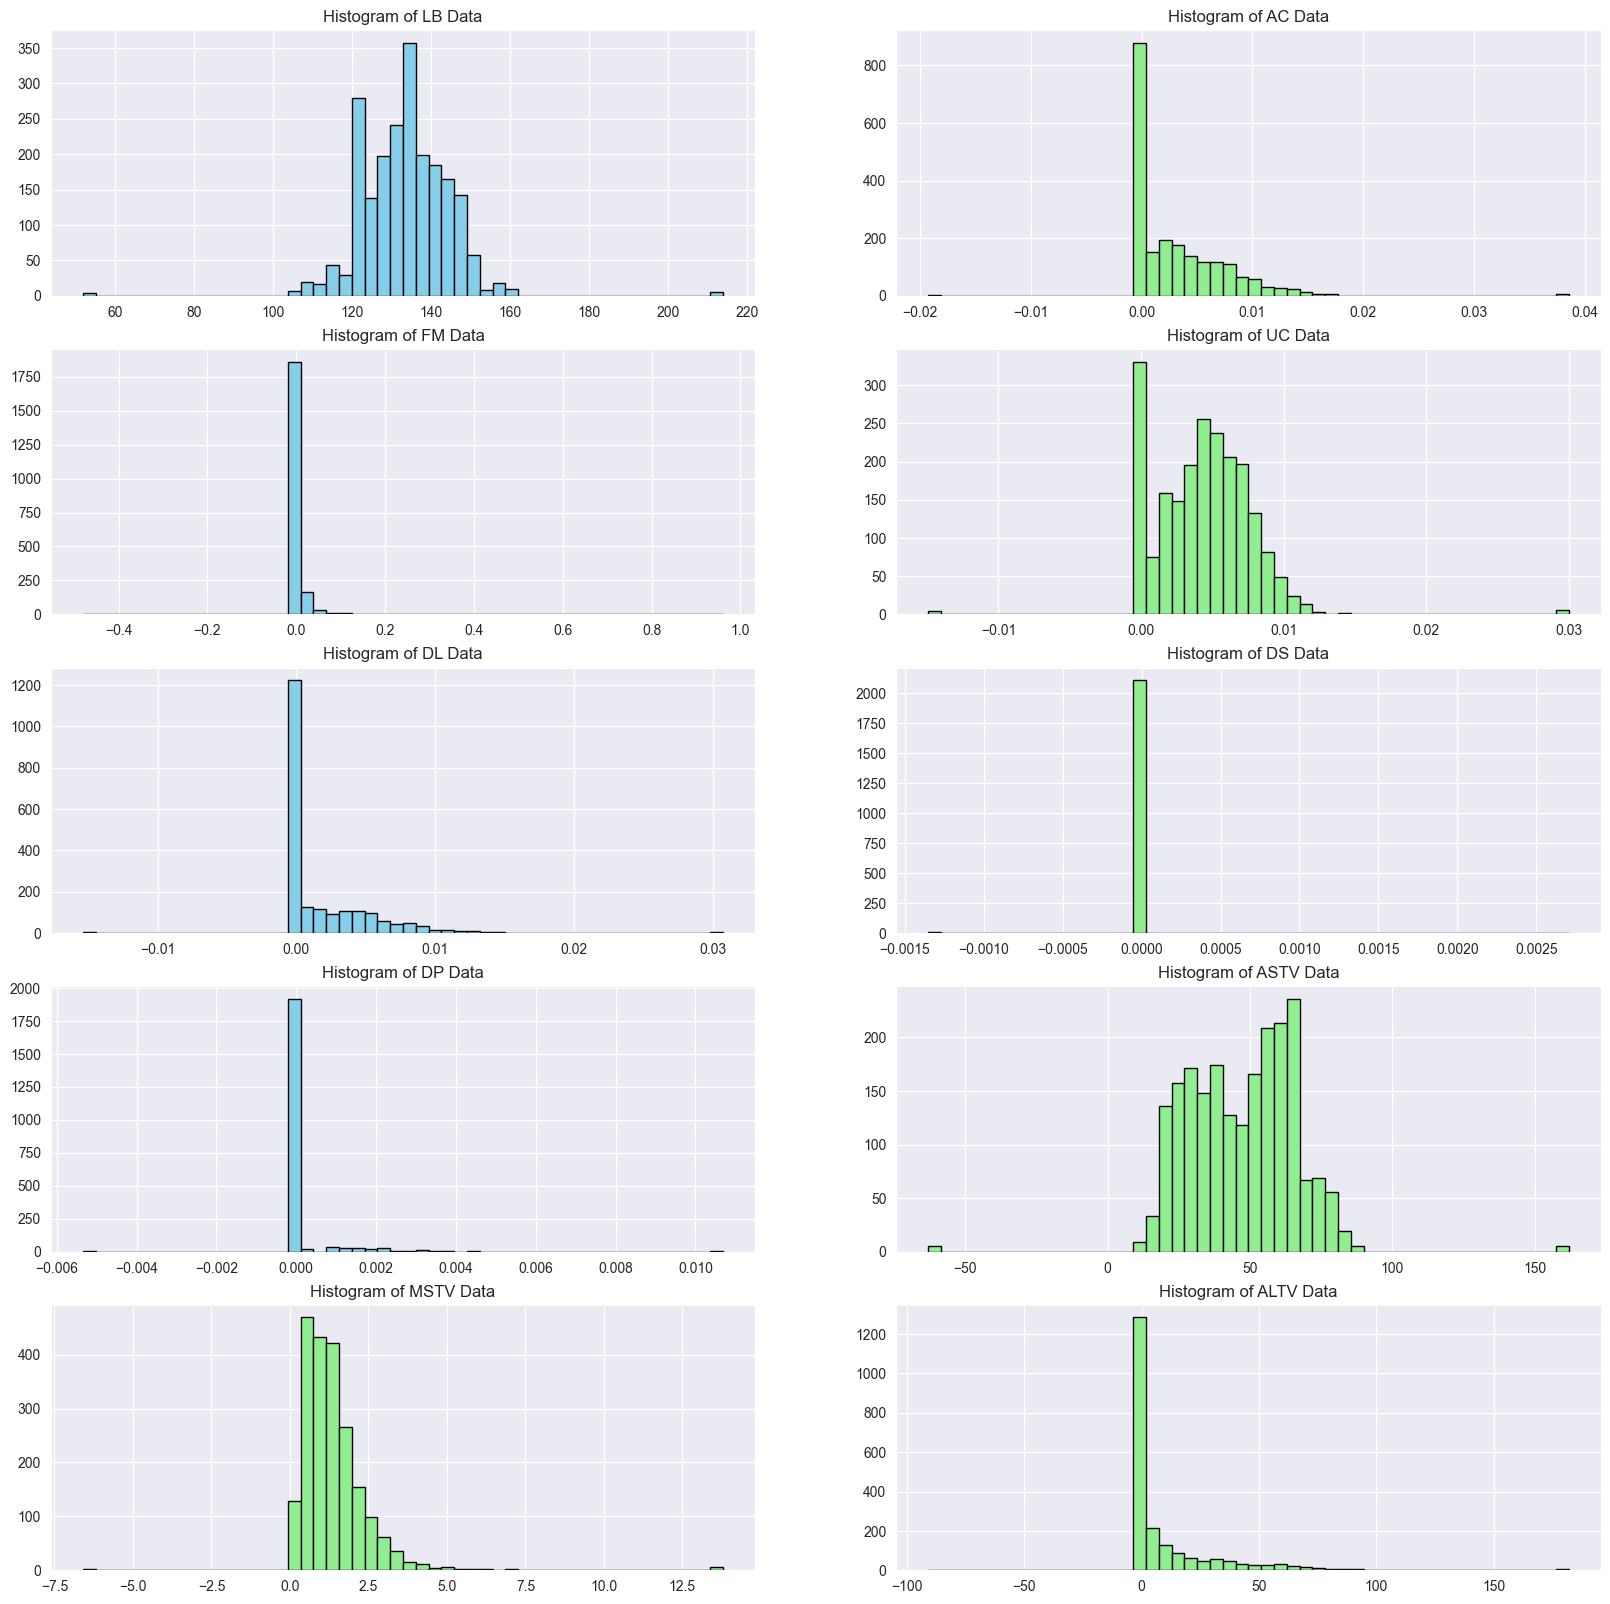

In [20]:
fig, axs = plt.subplots(5, 2,figsize=(20, 20))
axs[0, 0].hist(data['LB'], bins=50, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Histogram of LB Data')

axs[0, 1].hist(data['AC'], bins=50, color='lightgreen', edgecolor='black')
axs[0, 1].set_title('Histogram of AC Data')

axs[1, 0].hist(data['FM'], bins=50, color='skyblue', edgecolor='black')
axs[1, 0].set_title('Histogram of FM Data')

axs[1, 1].hist(data['UC'], bins=50, color='lightgreen', edgecolor='black')
axs[1, 1].set_title('Histogram of UC Data')

axs[2, 0].hist(data['DL'], bins=50, color='skyblue', edgecolor='black')
axs[2, 0].set_title('Histogram of DL Data')

axs[2, 1].hist(data['DS'], bins=50, color='lightgreen', edgecolor='black')
axs[2, 1].set_title('Histogram of DS Data')

axs[3, 0].hist(data['DP'], bins=50, color='skyblue', edgecolor='black')
axs[3, 0].set_title('Histogram of DP Data')

axs[3, 1].hist(data['ASTV'], bins=50, color='lightgreen', edgecolor='black')
axs[3, 1].set_title('Histogram of ASTV Data')

axs[4, 0].hist(data['MSTV'], bins=50, color='lightgreen', edgecolor='black')
axs[4, 0].set_title('Histogram of MSTV Data')


axs[4, 1].hist(data['ALTV'], bins=50, color='lightgreen', edgecolor='black')
axs[4, 1].set_title('Histogram of ALTV Data')



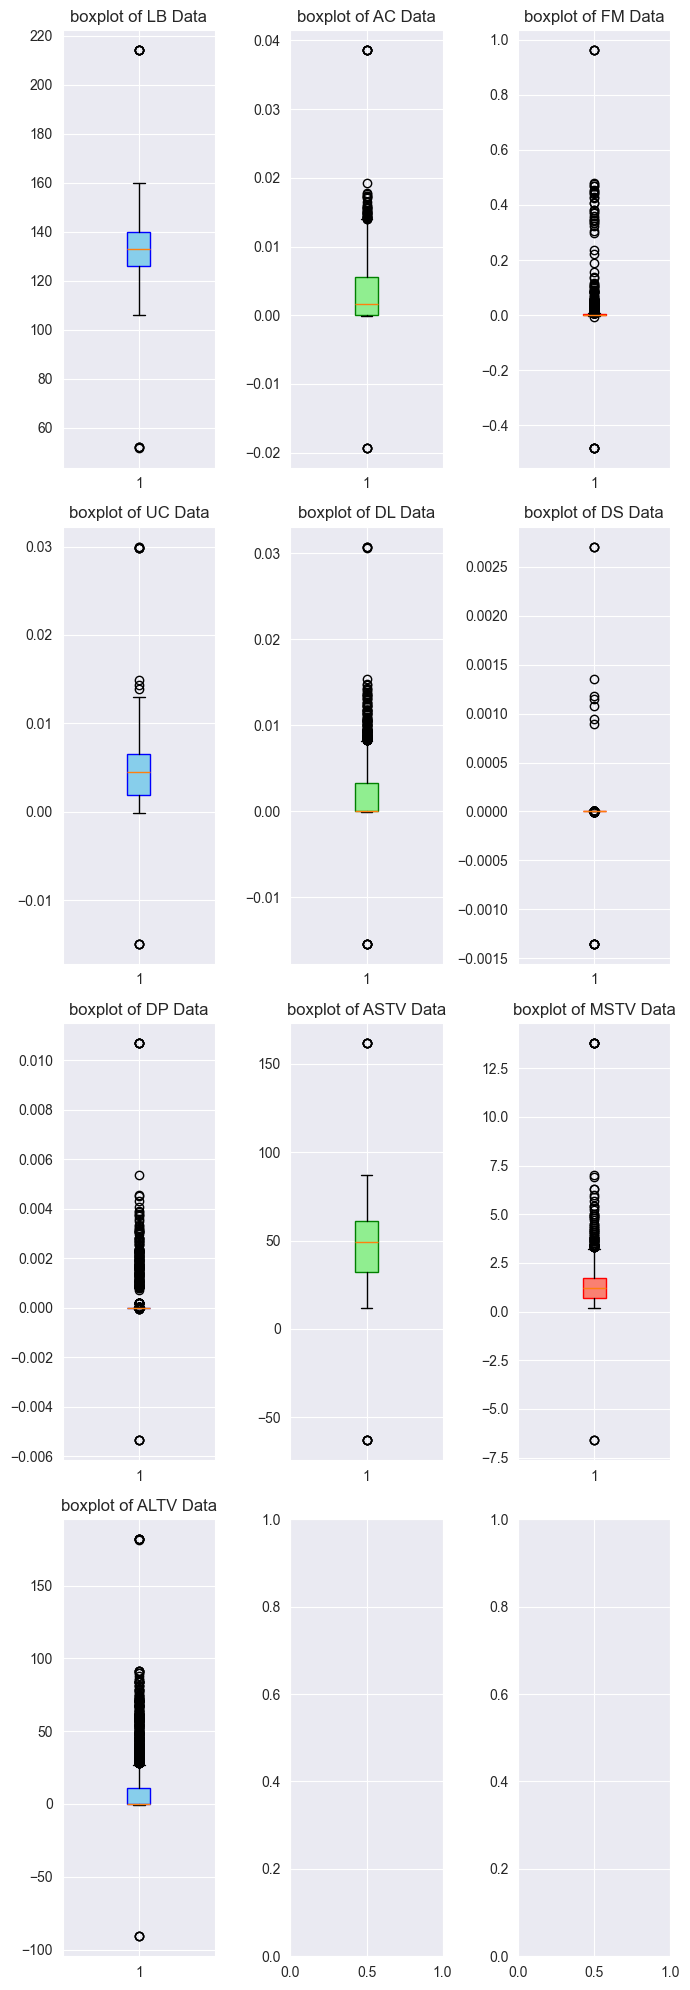

In [21]:
fig, axs = plt.subplots(4, 3, figsize=(7, 20))

axs[0, 0].boxplot(data['LB'], patch_artist=True, boxprops=dict(facecolor='skyblue', color='blue'))
axs[0, 0].set_title('boxplot of LB Data')

axs[0, 1].boxplot(data['AC'],  patch_artist=True, boxprops=dict(facecolor='lightgreen', color='green'))
axs[0, 1].set_title('boxplot of AC Data')

axs[0, 2].boxplot(data['FM'], patch_artist=True, boxprops=dict(facecolor='salmon', color='red'))
axs[0, 2].set_title('boxplot of FM Data')

axs[1, 0].boxplot(data['UC'], patch_artist=True, boxprops=dict(facecolor='skyblue', color='blue'))
axs[1, 0].set_title('boxplot of UC Data')

axs[1, 1].boxplot(data['DL'],  patch_artist=True, boxprops=dict(facecolor='lightgreen', color='green'))
axs[1, 1].set_title('boxplot of DL Data')

axs[1, 2].boxplot(data['DS'],  patch_artist=True, boxprops=dict(facecolor='salmon', color='red'))
axs[1, 2].set_title('boxplot of DS Data')

axs[2, 0].boxplot(data['DP'], patch_artist=True, boxprops=dict(facecolor='skyblue', color='blue'))
axs[2, 0].set_title('boxplot of DP Data')

axs[2, 1].boxplot(data['ASTV'], patch_artist=True, boxprops=dict(facecolor='lightgreen', color='green'))
axs[2, 1].set_title('boxplot of ASTV Data')

axs[2, 2].boxplot(data['MSTV'], patch_artist=True, boxprops=dict(facecolor='salmon', color='red'))
axs[2, 2].set_title('boxplot of MSTV Data')


axs[3, 0].boxplot(data['ALTV'], patch_artist=True, boxprops=dict(facecolor='skyblue', color='blue'))
axs[3, 0].set_title('boxplot of ALTV Data')
plt.tight_layout()
plt.show()

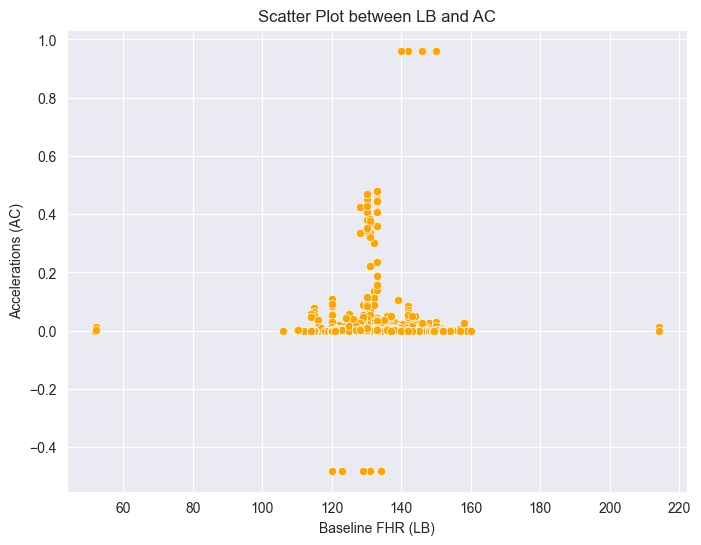

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['LB'], y=data['FM'], color='orange')
plt.title('Scatter Plot between LB and AC')
plt.xlabel('Baseline FHR (LB)')
plt.ylabel('Accelerations (AC)')
plt.show()

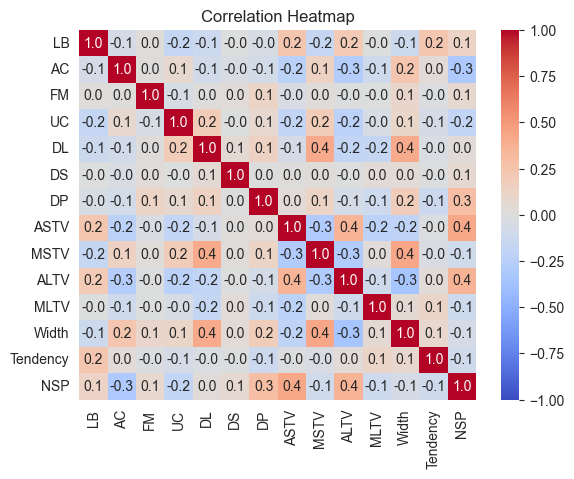

In [23]:
# Correlation heatmap
#plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.1f' ,vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

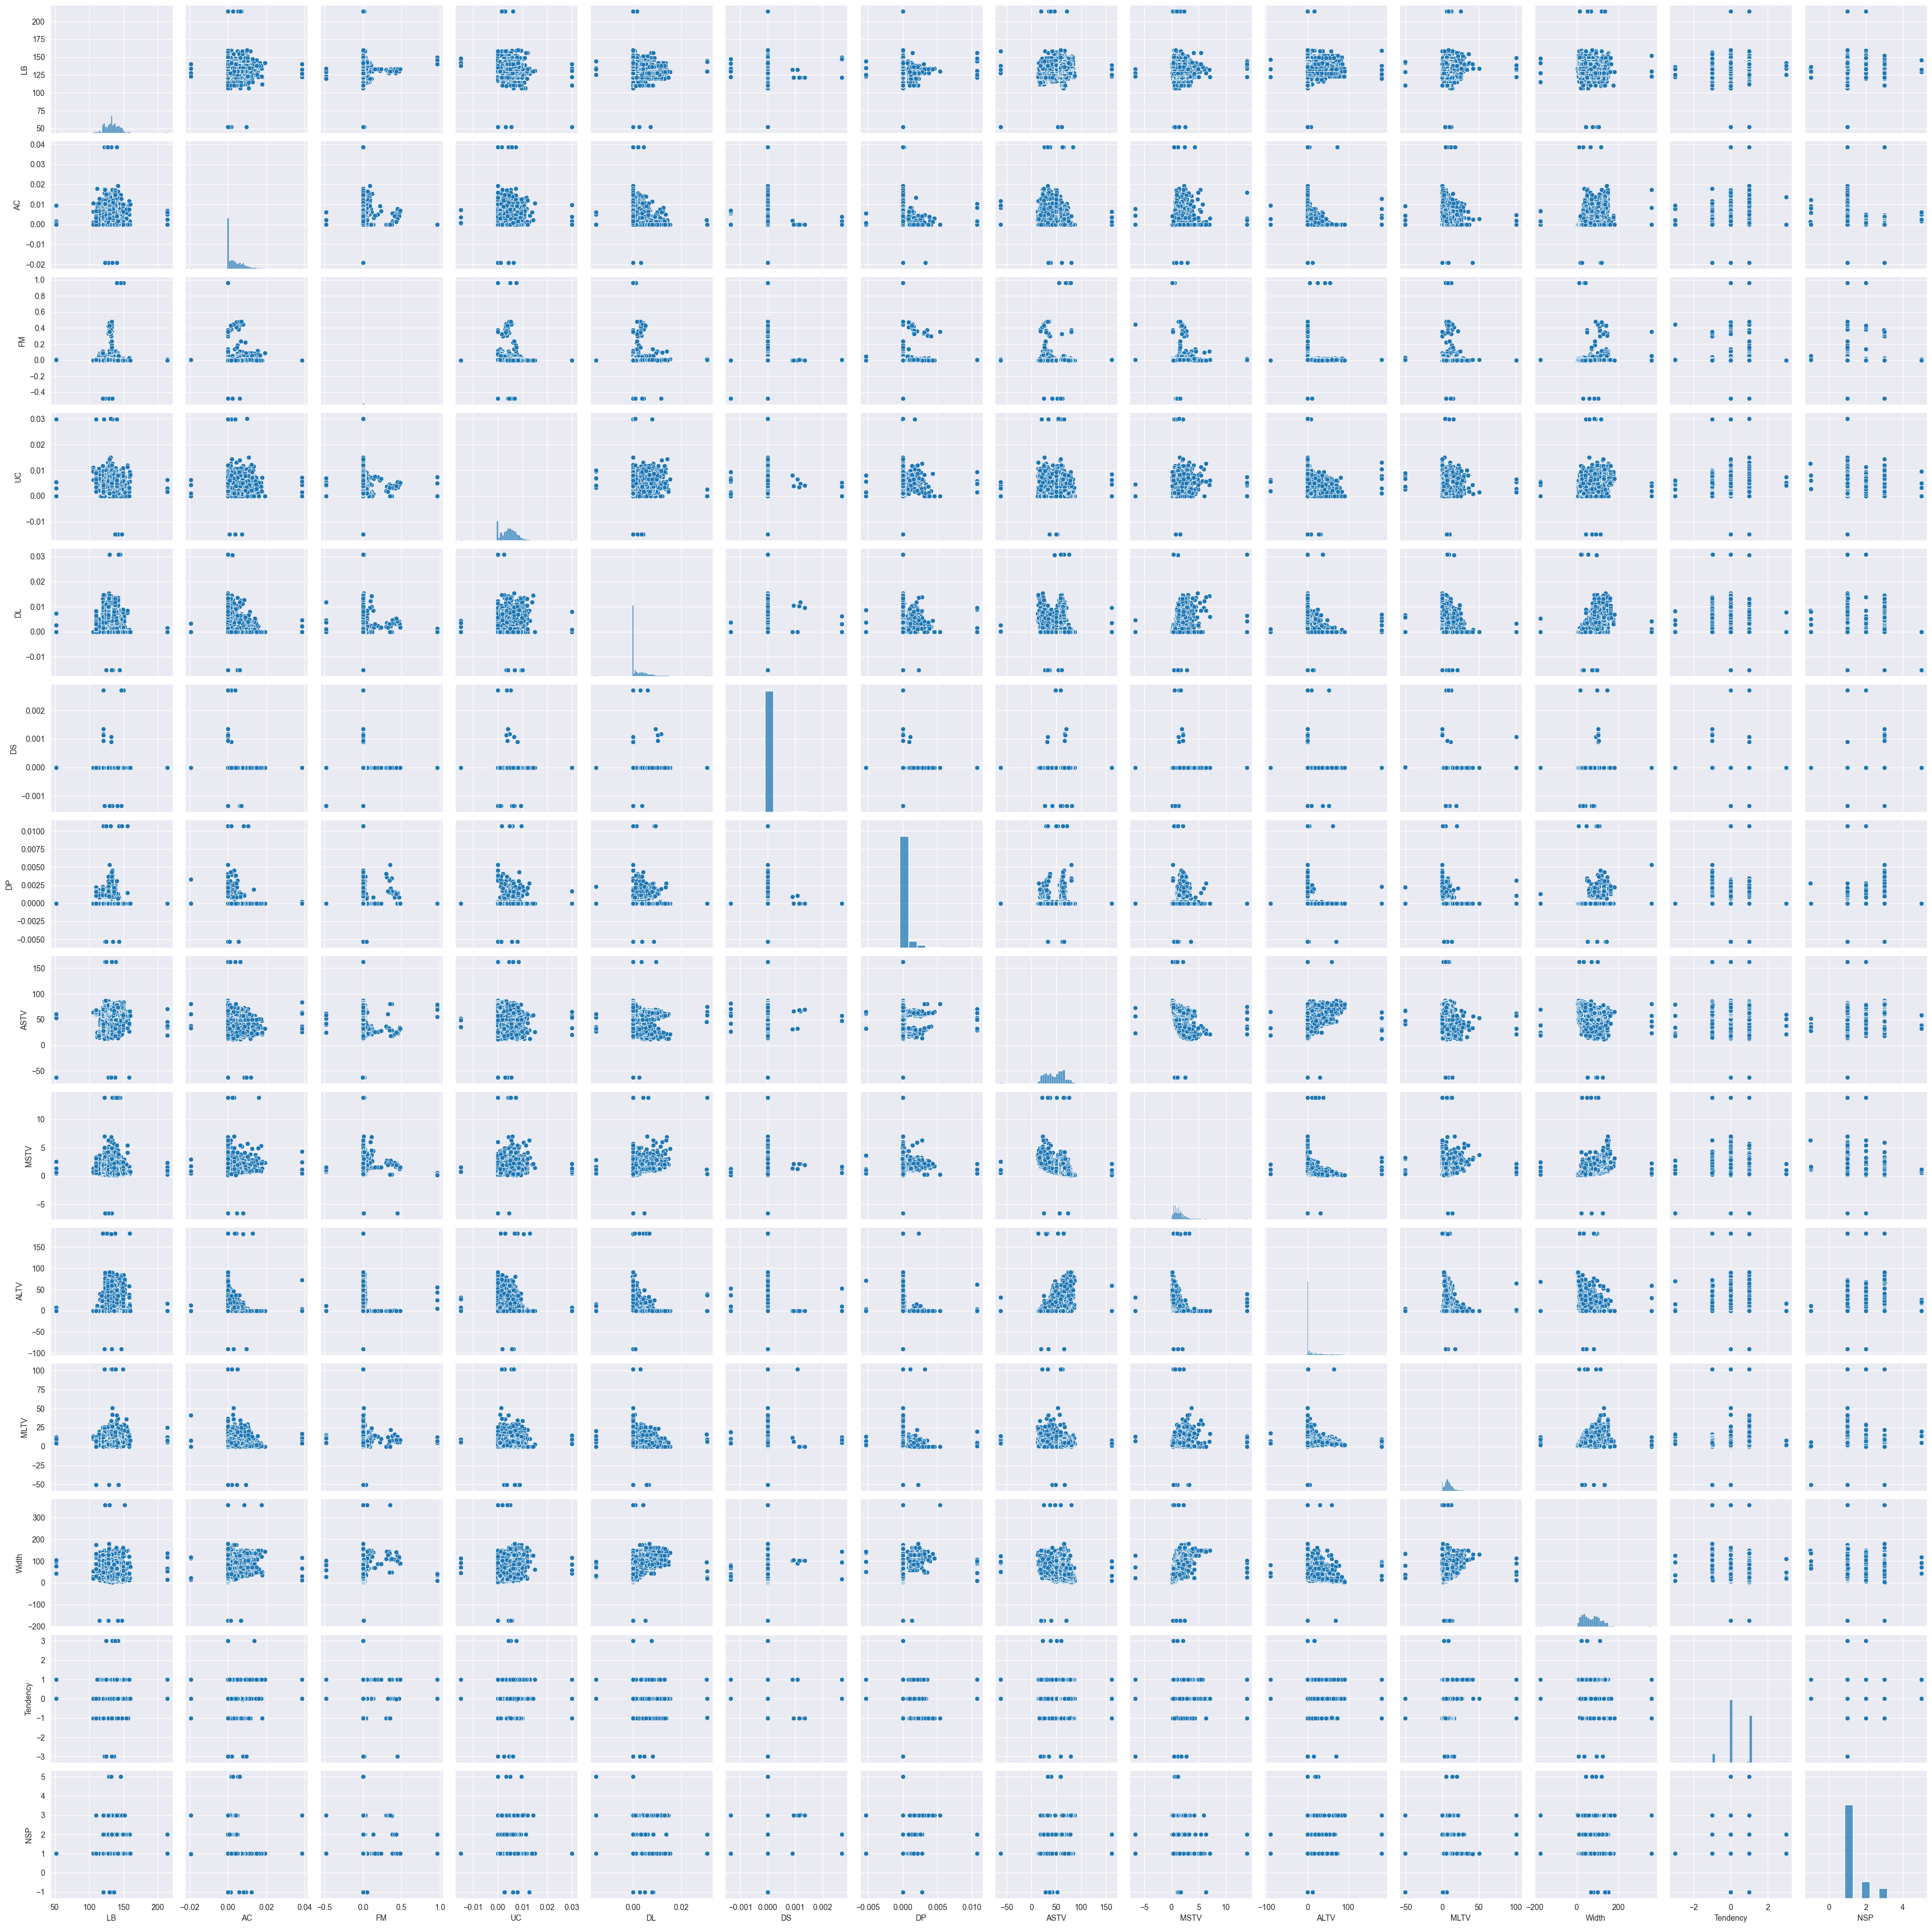

In [24]:
sns.pairplot(data)
plt.show()


#####  Correlation Analysis:


In [25]:
correlation_matrix = data.corr()
correlation_matrix

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.063452,0.018809,-0.166642,-0.126557,-0.005439,-0.047726,0.241666,-0.169224,0.210673,-0.003225,-0.118375,0.237112,0.132008
AC,-0.063452,1.000000,0.009406,0.071552,-0.093330,-0.033109,-0.083330,-0.231058,0.133903,-0.271204,-0.106308,0.238422,0.032399,-0.317113
FM,0.018809,0.009406,1.000000,-0.053386,0.009641,0.029896,0.121248,-0.032838,0.017061,-0.012005,-0.006157,0.097133,-0.018410,0.073997
UC,-0.166642,0.071552,-0.053386,1.000000,0.189737,-0.006942,0.070348,-0.182379,0.189685,-0.227881,-0.048862,0.106787,-0.067098,-0.185953
DL,-0.126557,-0.093330,0.009641,0.189737,1.000000,0.058429,0.144853,-0.069907,0.410216,-0.187275,-0.165494,0.409793,-0.023838,0.025179
DS,-0.005439,-0.033109,0.029896,-0.006942,0.058429,1.000000,0.004282,0.008414,0.016079,-0.004400,0.034366,0.040831,-0.015408,0.065399
DP,-0.047726,-0.083330,0.121248,0.070348,0.144853,0.004282,1.000000,0.037955,0.119270,-0.077760,-0.113993,0.175240,-0.130510,0.294416
ASTV,0.241666,-0.231058,-0.032838,-0.182379,-0.069907,0.008414,0.037955,1.000000,-0.293820,0.357310,-0.219922,-0.208439,-0.011367,0.422515
MSTV,-0.169224,0.133903,0.017061,0.189685,0.410216,0.016079,0.119270,-0.293820,1.000000,-0.291979,0.028807,0.435563,-0.036849,-0.095143
ALTV,0.210673,-0.271204,-0.012005,-0.227881,-0.187275,-0.004400,-0.077760,0.357310,-0.291979,1.000000,-0.107475,-0.346960,0.036552,0.365708


##### summary

In [26]:
# Moderate Correlation : 
#  positive:MSTV,DL
# Negative : AC,ALTV